# MẪU PHÂN TÍCH QUY TRÌNH KINH DOANH
>*Có 2 phiên bản tiếng Việt và tiếng Anh*
>*Dự án này nhằm mục đích rèn luyện kỹ năng phân tích.*

Dự án này sẽ hướng dẫn bạn phân tích thăm dò quy trình kinh doanh mẫu. Chúng ta sẽ tìm hiểu về 2 giai đoạn chính của phân tích dữ liệu: sắp xếp dữ liệu và phân tích dữ liệu. Và từ việc phân tích dữ liệu có sẵn, chúng tôi đưa ra một số phương án giả định cho công ty.

## Miêu tả dữ liệu
- Tập dữ liệu này được tìm thấy từ trang web kaggle.
## Sắp xếp dữ liệu và EDA
Bây giờ là lúc để khám phá dữ liệu.

Khi xử lý một lượng lớn dữ liệu, có thể hữu ích nếu bắt đầu bằng cách làm việc với một mẫu dữ liệu. Điều này giúp dễ dàng xác minh rằng các bước sắp xếp dữ liệu của chúng tôi đang hoạt động bình thường vì mã của chúng tôi sẽ mất ít thời gian hơn để thực thi. Khi chúng tôi tự tin vào cách tiếp cận của mình, chúng tôi có thể mở rộng quy mô để làm việc trên toàn bộ tập dữ liệu.

Để bắt đầu phân tích, hãy bắt đầu bằng cách chạy ô mã đầu tiên để tải tất cả các gói và chức năng cần thiết. Sau đó, thực thi ô mã thứ hai để đọc tập hợp con của tệp dữ liệu chuyến đi đầu tiên. Điều này sẽ tạo một tệp mới chỉ chứa tập hợp con dữ liệu mà chúng tôi quan tâm ban đầu.

- Bây giờ nhập một số thư viện cần thiết

In [113]:

import pandas as pd
import statistics as stat
import datetime
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [114]:
# Read data from excel file
sample_data = pd.read_excel('sample.xls')

In [115]:
pd.set_option('display.max_columns', None)
sample_data.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [116]:
sample_data.tail(5)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,California,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [117]:
sample_data.shape

(9994, 21)

In [118]:
sample_data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [119]:
sample_data.isnull().any()

Row ID           False
Order ID         False
Order Date       False
Ship Date        False
Ship Mode        False
Customer ID      False
Customer Name    False
Segment          False
Country          False
City             False
State            False
Postal Code      False
Region           False
Product ID       False
Category         False
Sub-Category     False
Product Name     False
Sales            False
Quantity         False
Discount         False
Profit           False
dtype: bool

In [120]:
sample_data.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

* Các kết luận phụ:
     - Tập dữ liệu này có 9994 hàng và 21 cột.
     - Thật tuyệt vời khi không có giá trị nào bị thiếu trong tập dữ liệu này. chúng ta có thể tin tưởng vào độ tin cậy của tập dữ liệu.
     - Chúng ta có 6 cột do giá trị số cần xử lý. Đây là cột rất quan trọng để có thêm kiến thức về phân tích.

In [121]:
for column in sample_data.columns:
    print("{}: Unique: {}, list: {}".format(str(column),len(sample_data[column].unique().tolist()),sample_data[column].unique().tolist()))


Row ID: Unique: 9994, list: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,

In [122]:
print("Unique Product name: {}".format(len(sample_data['Product Name'].unique().tolist())))
print("All product count: {}".format( sample_data.shape[0]))

Unique Product name: 1850
All product count: 9994


Để xử lý tập dữ liệu này dễ dàng hơn, chúng ta nên xóa một số cột không quan trọng cho việc phân tích dữ liệu

In [123]:
sample_data_copy = sample_data.drop(columns=["Row ID",'Order ID',"Customer ID",'Product ID',"Postal Code","City","Country"])
sample_data_copy.shape

(9994, 14)

In [124]:
sample_data_copy.head() 

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [125]:
sample_data_copy.describe()

,Order Date,Ship Date,Sales,Quantity,Discount,Profit
count,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
mean,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,229.858001,3.789574,0.156203,28.656896
min,2014-01-03 00:00:00,2014-01-07 00:00:00,0.444000,1.000000,0.000000,-6599.978000
25%,2015-05-23 00:00:00,2015-05-27 00:00:00,17.280000,2.000000,0.000000,1.728750
50%,2016-06-26 00:00:00,2016-06-29 00:00:00,54.490000,3.000000,0.200000,8.666500
75%,2017-05-14 00:00:00,2017-05-18 00:00:00,209.940000,5.000000,0.200000,29.364000
max,2017-12-30 00:00:00,2018-01-05 00:00:00,22638.480000,14.000000,0.800000,8399.976000
std,NaN,NaN,623.245101,2.225110,0.206452,234.260108


Chúng tôi không cần quan tâm đến ngày đặt hàng và ngày giao hàng trong mô tả này
- Chúng tôi có tổng cộng 9994 đơn hàng.
- Doanh thu trung bình khoảng 229.858001
- Giá bán trung bình là 54,49
- Doanh số 75% là 209,94 nghĩa là chúng ta có 25% đơn hàng lớn hơn 209,94 nhưng vẫn thấp hơn mức trung bình của doanh số.

   => Như vậy chưa đến 25% top đầu là khách hàng quan trọng nhất đối với hoạt động kinh doanh của chúng ta.

In [126]:
stat.multimode(sample_data['Sales'])

[12.96]

In [127]:
year, sales = stat.linear_regression(sample_data_copy["Order Date"].dt.year,sample_data['Sales']) # sales_forcast = year * year_input + sales
year1, profit = stat.linear_regression(sample_data_copy["Order Date"].dt.year,sample_data['Profit']) # sales_forcast = year * year_input + sales

In [128]:
sales_by_year = {"Year" :[], "Sales" : []}
profit_by_year ={"Year" :[], "Profit" : []}
for year_input in range(2014,2020): # 2014 -> 2019 
    sales_by_year["Year"].append( year_input)
    sales_by_year['Sales'].append( round(year * year_input + sales,2))
    profit_by_year["Year"].append(year_input)
    profit_by_year["Profit"].append(round(year1 * year_input + profit,2))
sales_by_year = pd.DataFrame.from_dict(sales_by_year)
sales_by_year.head()


,Year,Sales
0,2014,239.10
1,2015,233.74
2,2016,228.37
3,2017,223.00
4,2018,217.63


In [129]:
profit_by_year = pd.DataFrame.from_dict(profit_by_year)
profit_by_year.head()

,Year,Profit
0,2014,26.98
1,2015,27.95
2,2016,28.93
3,2017,29.90
4,2018,30.87


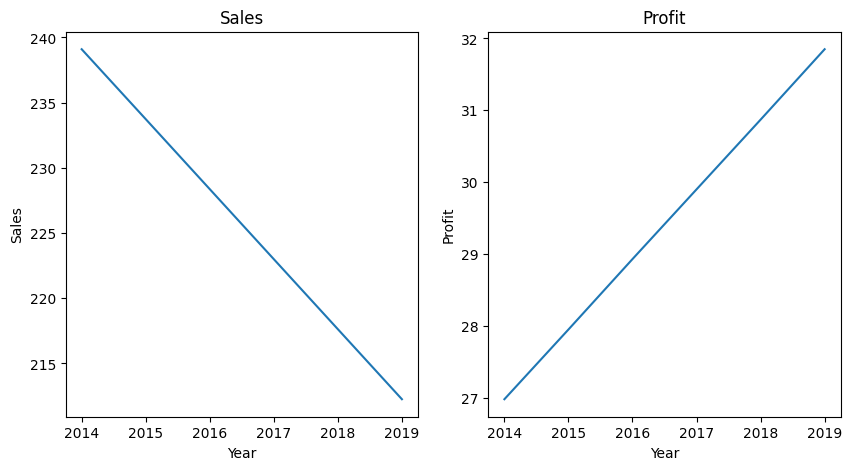

In [130]:
fig, ax = plt.subplots(1,2,figsize= (10 ,5 )) 
sns.lineplot(data = sales_by_year, x = "Year", y = "Sales" ,ax = ax[0]).set_title("Sales")
sns.lineplot(data = profit_by_year, x = "Year", y = "Profit" ,ax = ax[1]).set_title("Profit")
plt.show()

Bằng cách sử dụng lũy tiến tuyến tính, chúng ta có thể thấy hoạt động kinh doanh của mình dường như đang đi xuống theo từng năm. Để đi sâu vào nó, chúng ta hãy thử phân tích thêm.
## **Category**
> Để tạo pieplot theo tên cột dễ dàng hơn, tôi tạo hàm piePlot để hỗ trợ việc này bên dưới

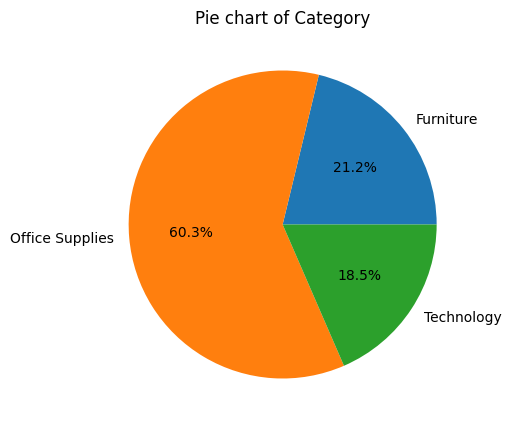

In [131]:
def piePlot(column_name, figsize = (5,5)):
    dict = {}
    for column in sample_data_copy[column_name].unique():
        dict[column] = sample_data_copy[column_name].where(sample_data_copy[column_name] == column).count()
    fig, ax = plt.subplots(figsize = figsize)
    plt.pie(list(dict.values()),labels= list(dict.keys()),autopct='%1.1f%%')
    ax.set_title("Pie chart of {}".format(column_name))
    plt.show()
piePlot("Category")



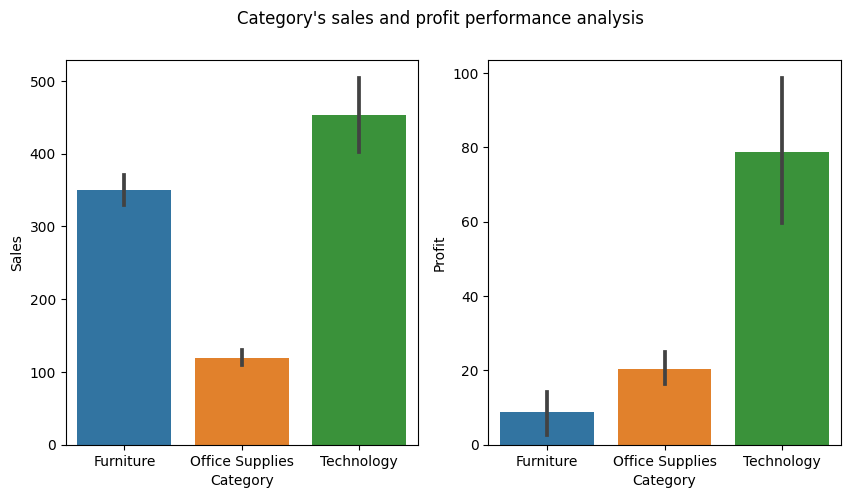

In [132]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))
fig.suptitle("Category's sales and profit performance analysis")
sns.barplot(sample_data,x = 'Category', y = 'Sales',ax = ax[0])
sns.barplot(sample_data,x = 'Category', y = 'Profit',ax = ax[1])
plt.show()

- Không có nhiều khác biệt giữa 'Vật tư văn phòng' và 'Công nghệ'. Nhưng chúng ta có thể thấy độ chênh lệch của  đồ nội thất rất cao.

In [133]:
sample_data_copy['Sub-Category'].where(sample_data_copy['Category'] == 'Furniture').unique().tolist()

['Bookcases', 'Chairs', nan, 'Tables', 'Furnishings']

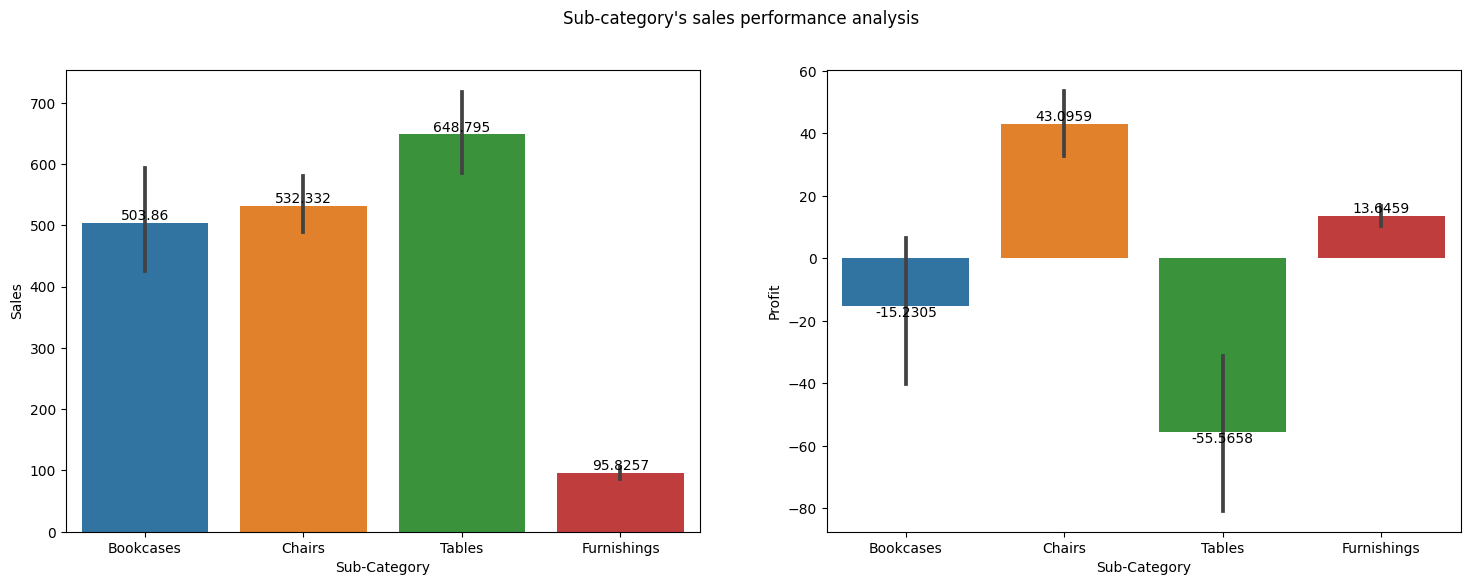

In [134]:

fig, ax = plt.subplots(1,2,figsize=(18, 6))
fig.suptitle("Sub-category's sales performance analysis")
sns.barplot(sample_data.where(sample_data_copy['Category'] == 'Furniture'),x = 'Sub-Category', y = 'Sales', ax=ax[0])
sns.barplot(sample_data.where(sample_data_copy['Category'] == 'Furniture'),x = 'Sub-Category', y = 'Profit', ax=ax[1])
for label1 in ax[0].containers:
    ax[0].bar_label(label1)
for label1 in ax[1].containers:
    ax[1].bar_label(label1)
plt.show()

**Bây giờ chúng ta biết *Tủ sách* và *Bàn* tạo ra lợi nhuận âm. Chúng ta sẽ tìm hiểu thêm về điều này sau.**

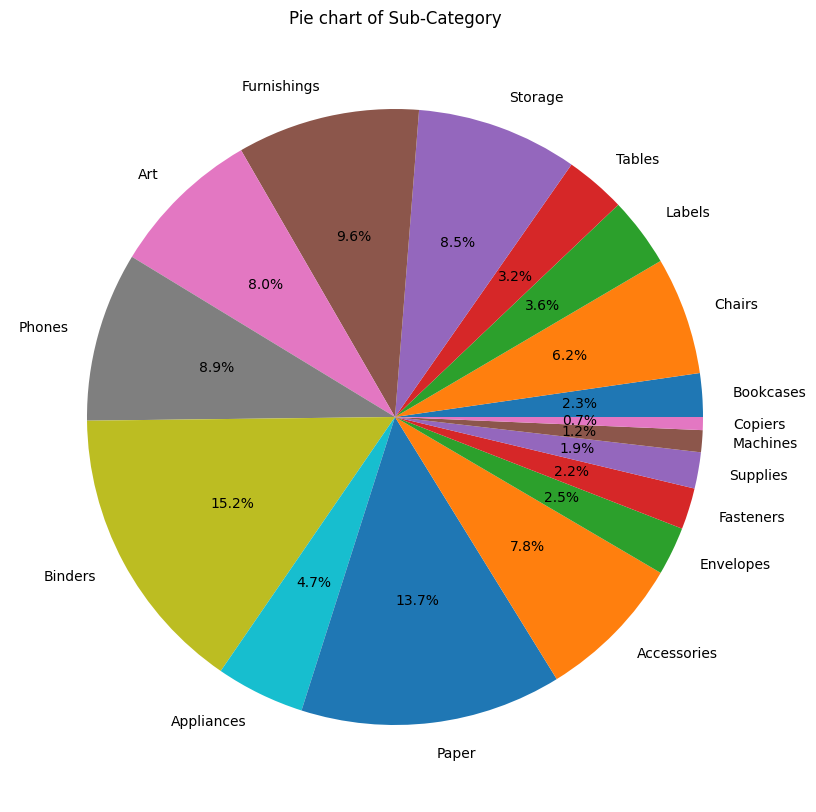

In [135]:
piePlot("Sub-Category",figsize=(10,10))

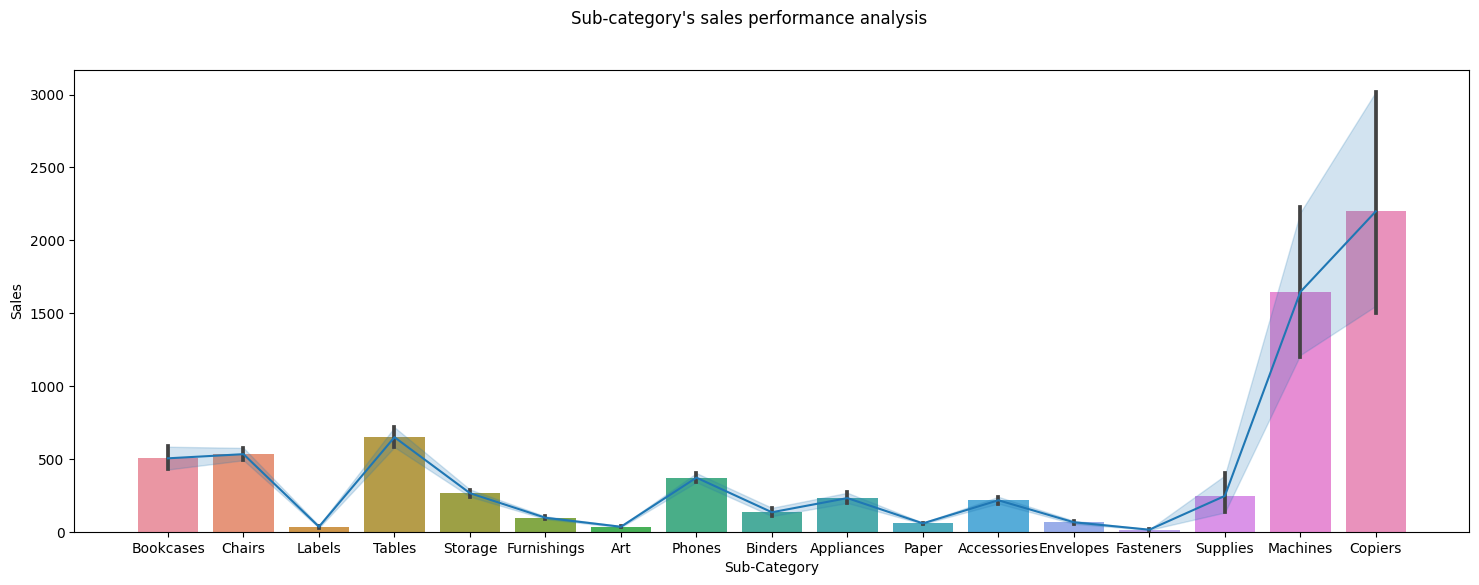

In [136]:
fig, ax = plt.subplots(figsize=(18, 6))
fig.suptitle("Sub-category's sales performance analysis")
sns.barplot(sample_data,x = 'Sub-Category', y = 'Sales', ax=ax)
sns.lineplot(sample_data,x = 'Sub-Category', y = 'Sales', ax=ax)
plt.show()

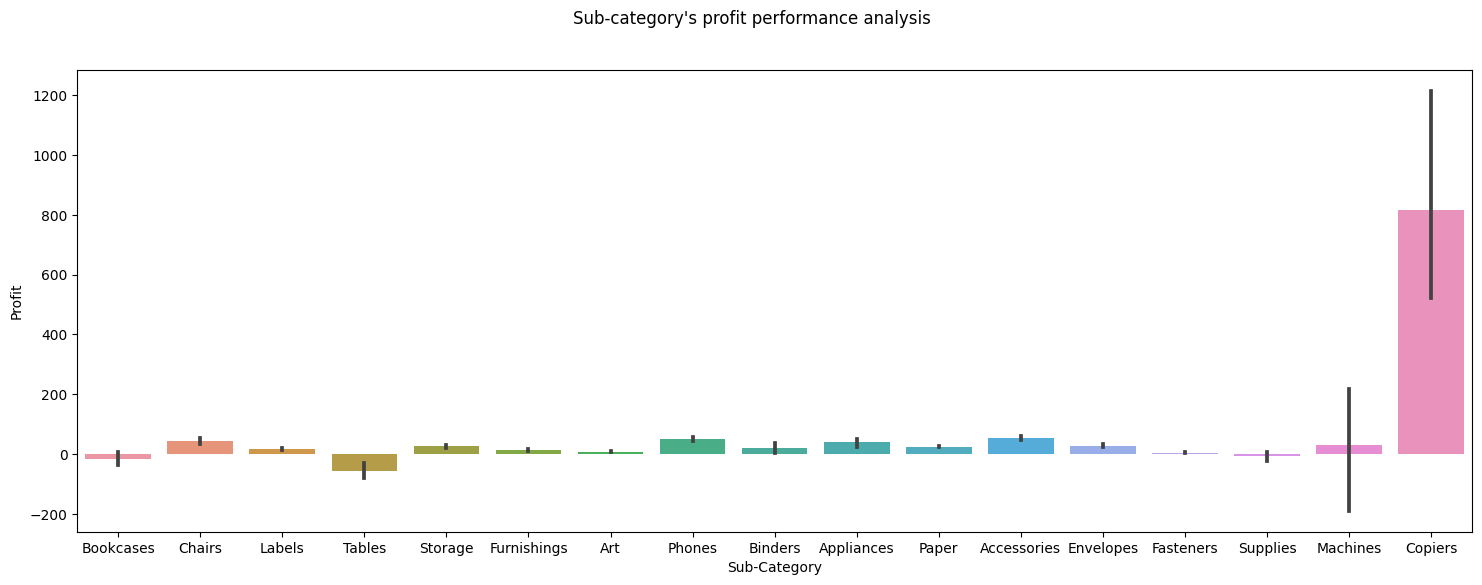

In [137]:
fig, ax = plt.subplots(figsize=(18, 6))
fig.suptitle("Sub-category's profit performance analysis")
sns.barplot(sample_data,y = 'Profit',x = 'Sub-Category', ax=ax)
plt.show()

## **Segment**

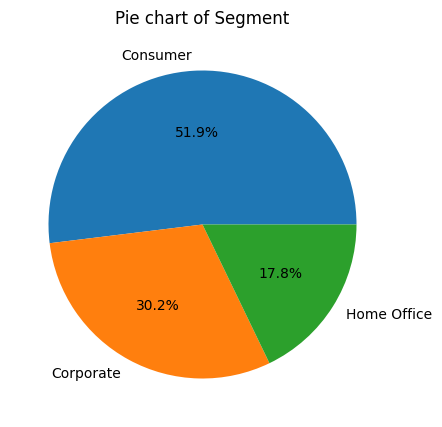

In [138]:
piePlot('Segment')

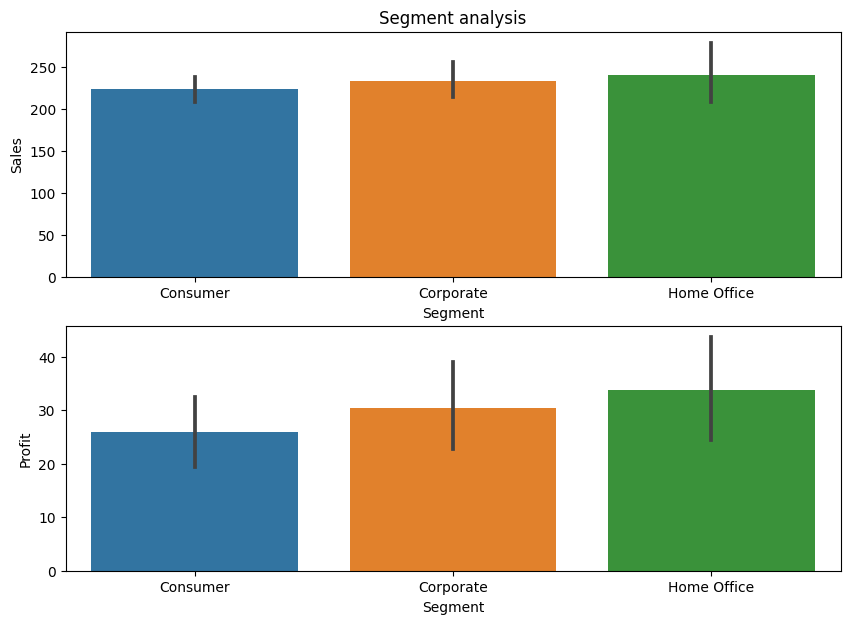

In [139]:
fig, ax = plt.subplots(2,1,figsize = (10,7))
sns.barplot(sample_data_copy,x = 'Segment',y= 'Sales', ax= ax[0]).set_title('Segment analysis')
sns.barplot(sample_data_copy,x = 'Segment',y= 'Profit', ax= ax[1])
plt.show()

## **Ship Mode**

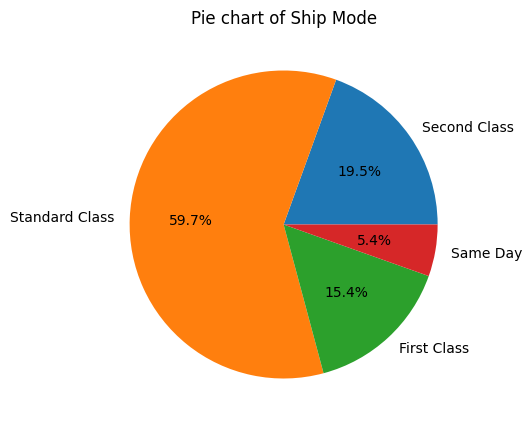

In [140]:
piePlot("Ship Mode")

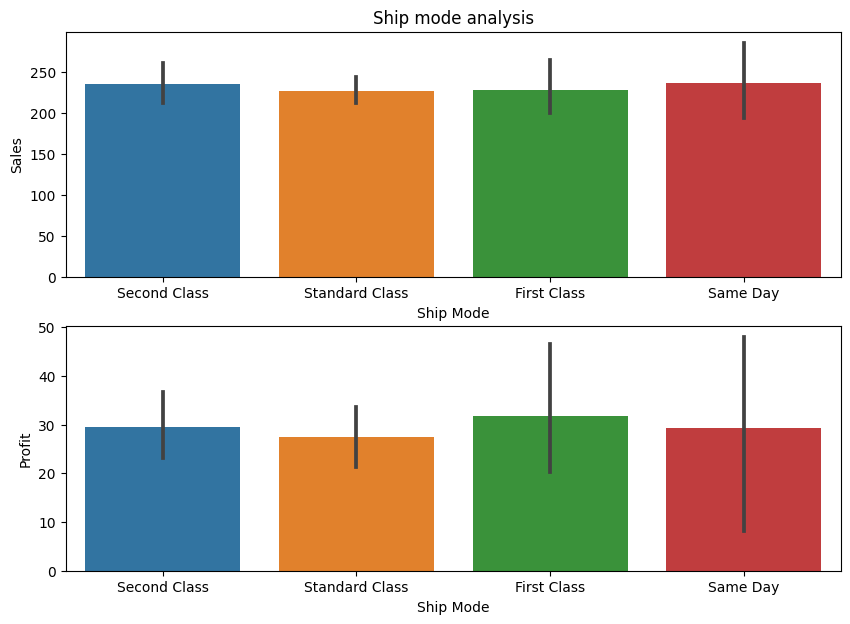

In [141]:
fig, ax = plt.subplots(2,1,figsize = (10,7))
sns.barplot(sample_data_copy ,x = 'Ship Mode',y= 'Sales',ax = ax[0]).set_title('Ship mode analysis')
sns.barplot(sample_data_copy ,x = 'Ship Mode',y= 'Profit',ax = ax[1])
plt.show()

## **Region**

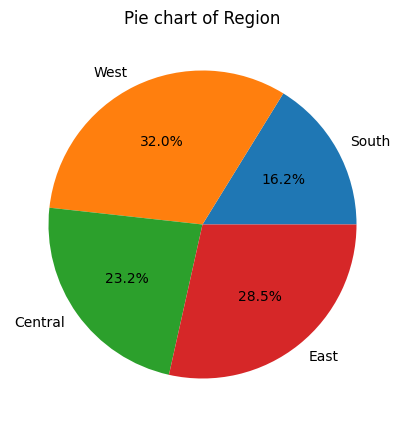

In [142]:
piePlot("Region")

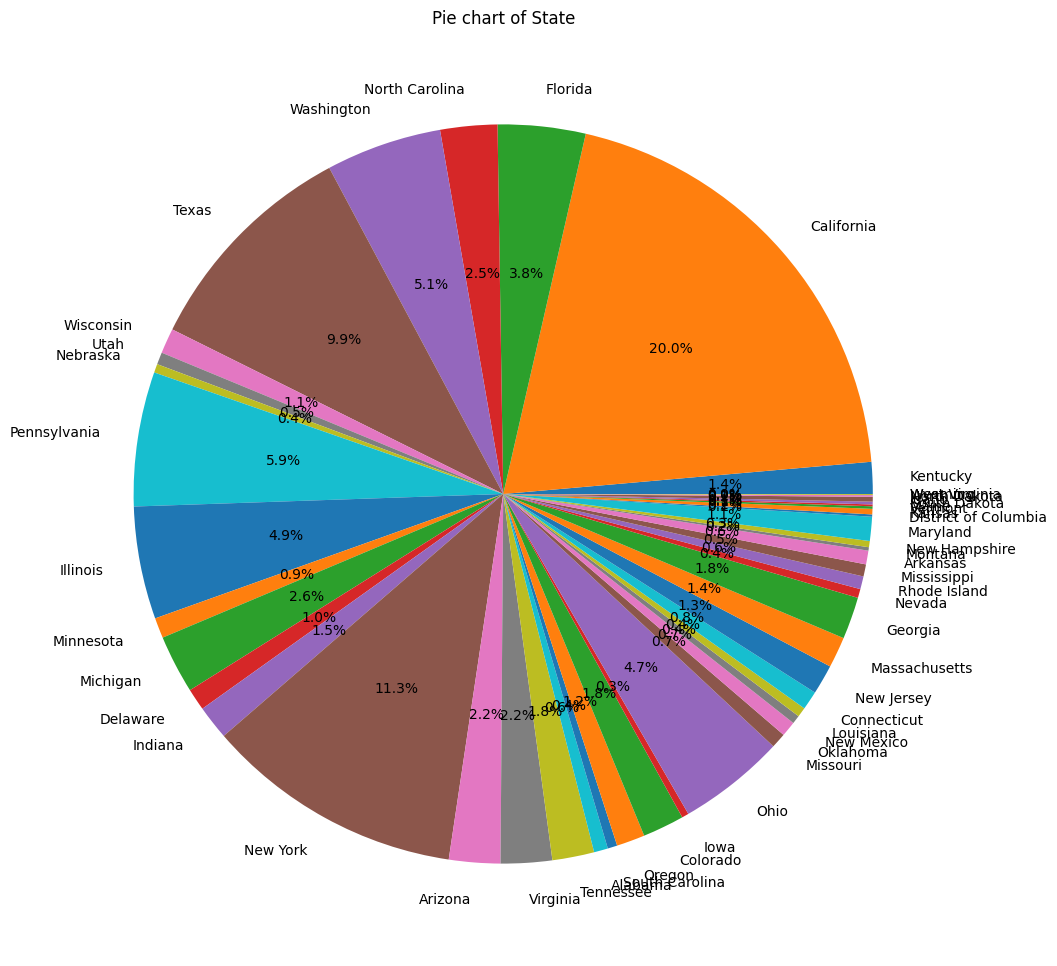

In [143]:
piePlot(column_name="State",figsize = (12,12))

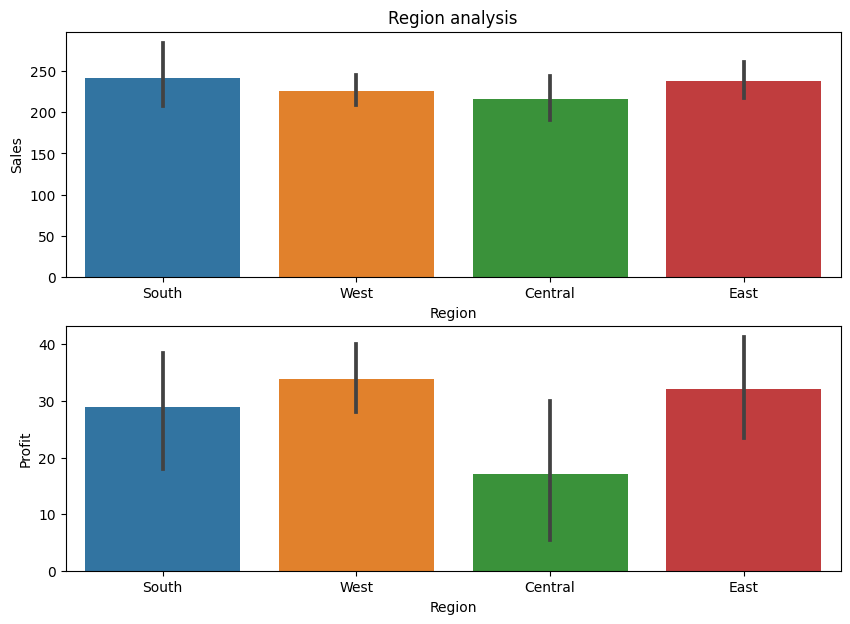

In [144]:
fig, ax = plt.subplots(2,1,figsize = (10,7))
sns.barplot(sample_data_copy ,x = 'Region',y= 'Sales', ax = ax[0]).set_title('Region analysis')
sns.barplot(sample_data_copy ,x = 'Region',y= 'Profit', ax = ax[1])
plt.show()

- Các yếu tố như: Segment, Shipmode, Region hầu như không liên quan đến quá trình kinh doanh.

## **Shipping**

In [145]:
sample_data_copy["Ship Time"] = sample_data_copy["Ship Date"] - sample_data_copy['Order Date']
sample_data_copy.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Ship Time
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3 days
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3 days
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4 days
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7 days
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7 days


In [146]:
sample_data_copy['Ship Time'].describe()

count                         9994
mean     3 days 22:59:46.311787072
std      1 days 17:56:29.766161104
min                0 days 00:00:00
25%                3 days 00:00:00
50%                4 days 00:00:00
75%                5 days 00:00:00
max                7 days 00:00:00
Name: Ship Time, dtype: object

- Chúng ta có thể thấy ở đây, thời gian vận chuyển dài nhất là 7 ngày
- Ngắn nhất là 0 ngày nghĩa là tất cả các đơn hàng đều được vận chuyển thành công
- Thời gian vận chuyển trung bình là gần 4 ngày.

In [147]:
sample_data_copy['Ship Time'].unique()

<TimedeltaArray>
['3 days', '4 days', '7 days', '5 days', '2 days', '6 days', '1 days',
 '0 days']
Length: 8, dtype: timedelta64[ns]

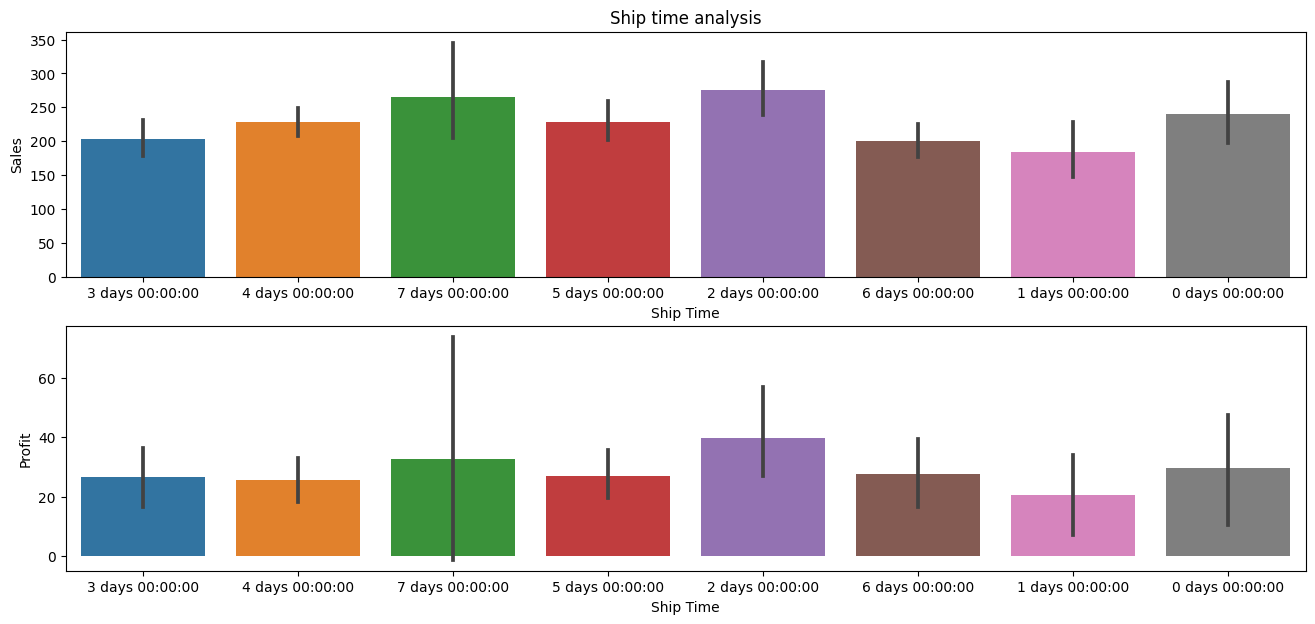

In [148]:
fig, ax = plt.subplots(2,1,figsize=(16, 7))
sns.barplot(sample_data_copy ,x = 'Ship Time',y= 'Sales',ax = ax[0]).set_title('Ship time analysis')
sns.barplot(sample_data_copy ,x = 'Ship Time',y= 'Profit',ax = ax[1])
plt.show()

**Những thứ mất nhiều thời gian nhất để vận chuyển là gì?**

In [149]:
sample_data_copy['Ship Time'] = sample_data_copy['Ship Time'].dt.days

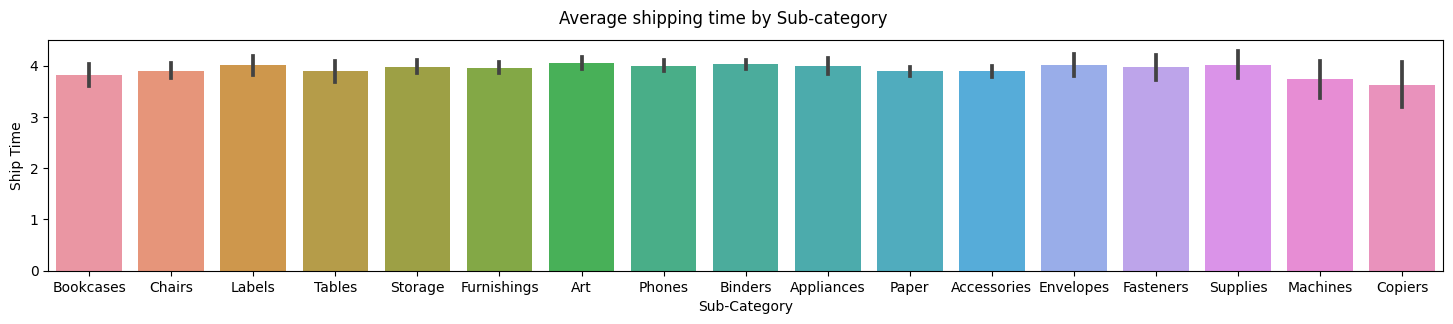

In [150]:
fig, ax = plt.subplots(figsize=(18, 3))
fig.suptitle('Average shipping time by Sub-category')
sns.barplot(data= sample_data_copy, y = 'Ship Time', x = "Sub-Category")
plt.show()

## **Discount**

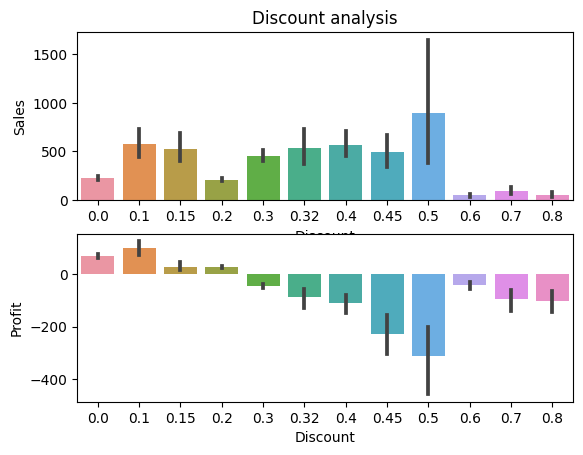

In [151]:
fig, ax = plt.subplots(2,1)
sns.barplot(sample_data_copy ,x = 'Discount',y= 'Sales', ax = ax[0]).set_title('Discount analysis')
sns.barplot(sample_data_copy ,x = 'Discount',y= 'Profit',ax = ax[1])
plt.show()

Ở đây, chúng ta có thể thấy số tiền chiết khấu ảnh hưởng rất lớn đến lợi nhuận.
- Chiết khấu từ 0,3 đến 0,8 khiến lợi nhuận âm.
- Nếu muốn có lãi thì nên cân nhắc mức chiết khấu dưới 0,3

In [152]:
sample_data_copy['Profit'].describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

- lợi nhuận trung bình là khoảng 28,65$.
- có 25% đơn hàng tạo ra lợi nhuận hơn 29,364$.

In [153]:
sample_data_copy['Year'] = pd.DatetimeIndex(sample_data_copy['Order Date']).year
sample_data_copy['Month'] = pd.DatetimeIndex(sample_data_copy['Order Date']).month
sample_data_copy.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Ship Time,Year,Month
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3,2016,11
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3,2016,11
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4,2016,6
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7,2015,10
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7,2015,10


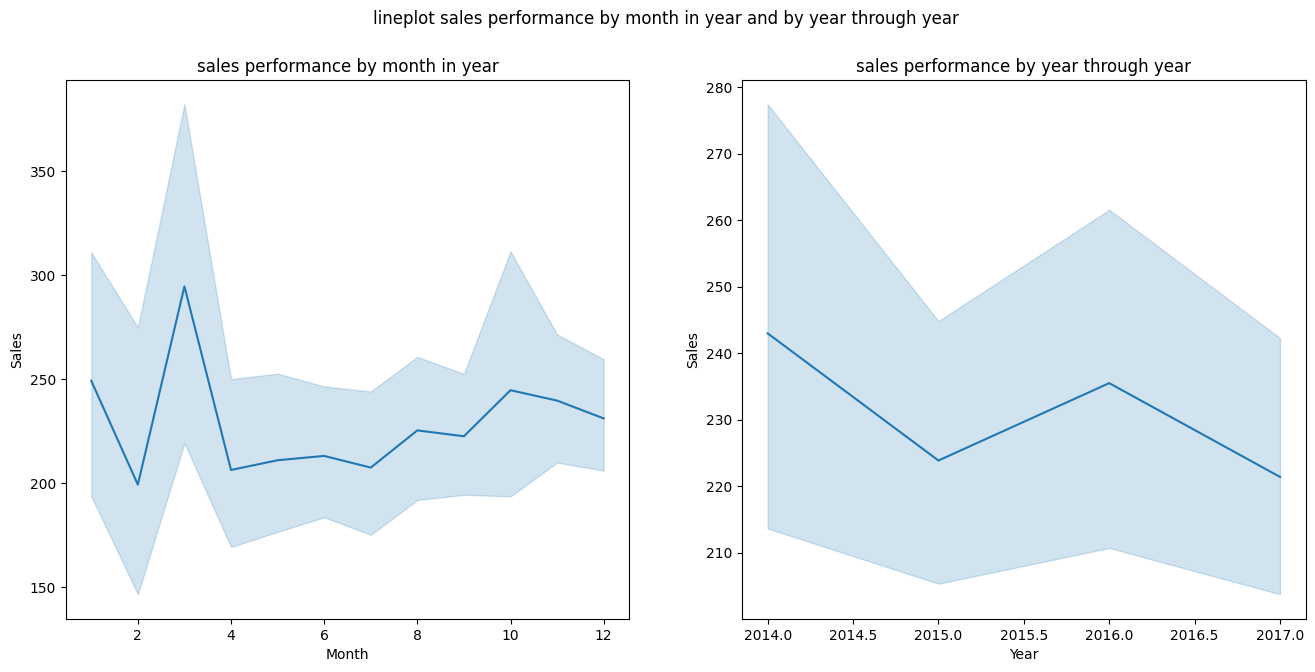

In [154]:
fig, axes = plt.subplots(1,2, figsize = (16,7))
fig.suptitle('lineplot sales performance by month in year and by year through year')
axes[0].set_title('sales performance by month in year')
axes[1].set_title('sales performance by year through year')
sns.lineplot(data=sample_data_copy, x= "Month", y = "Sales",ax=axes[0])
sns.lineplot(data=sample_data_copy, x= "Year", y = "Sales",ax=axes[1])
plt.show()

Như chúng ta có thể thấy trong biểu đồ bên phải, Doanh số bán hàng đang có xu hướng giảm dần qua từng năm.

Trong biểu đồ bên trái, hiệu suất Bán hàng cao nhất vào tháng 3.
- Xu hướng tăng vào cuối mùa Xuân và đầu mùa Đông.
- Hiệu suất bán hàng giảm trong mùa Đông.

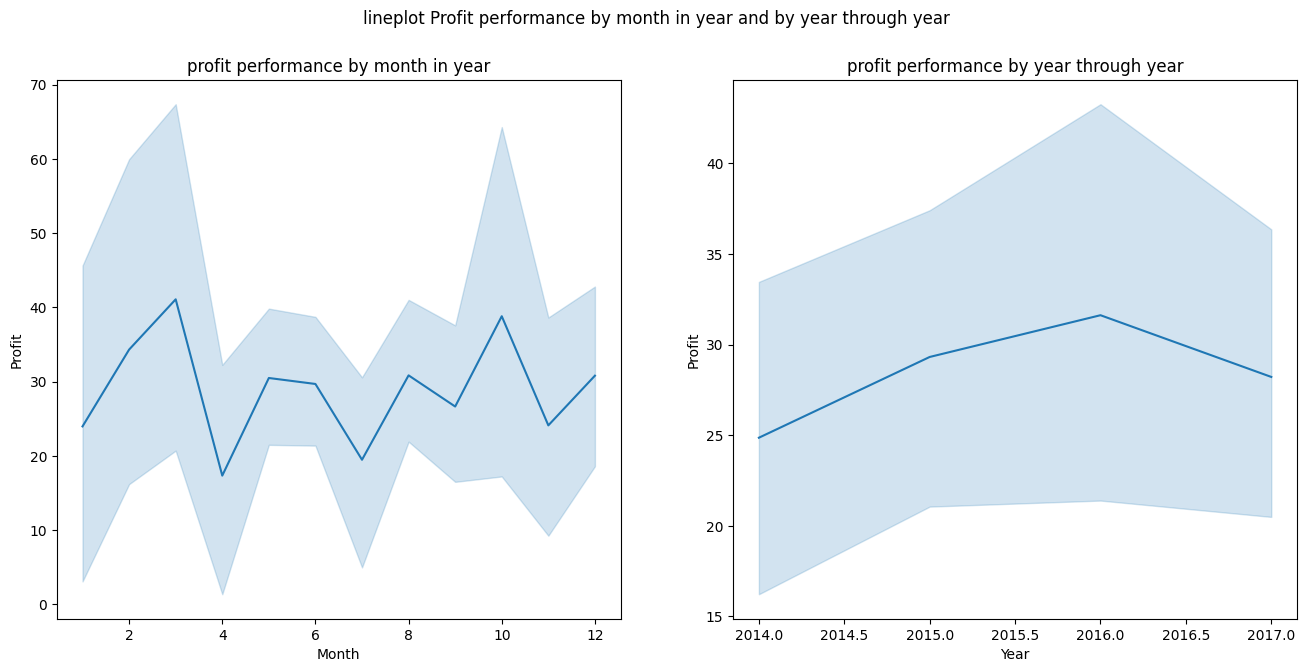

In [155]:
fig, axes = plt.subplots(1,2, figsize = (16,7))
fig.suptitle('lineplot Profit performance by month in year and by year through year')
axes[0].set_title('profit performance by month in year')
axes[1].set_title('profit performance by year through year')
sns.lineplot(data=sample_data_copy, x= "Month", y = "Profit",ax=axes[0])
sns.lineplot(data=sample_data_copy, x= "Year", y = "Profit",ax=axes[1])
plt.show()

Như chúng ta có thể thấy trong biểu đồ bên phải, Lợi nhuận có xu hướng tăng lên trong năm 2014 - 2016, giảm từ năm 2016 - 2017
Hiệu suất bán hàng và lợi nhuận theo tháng trong năm và theo năm không giống nhau.

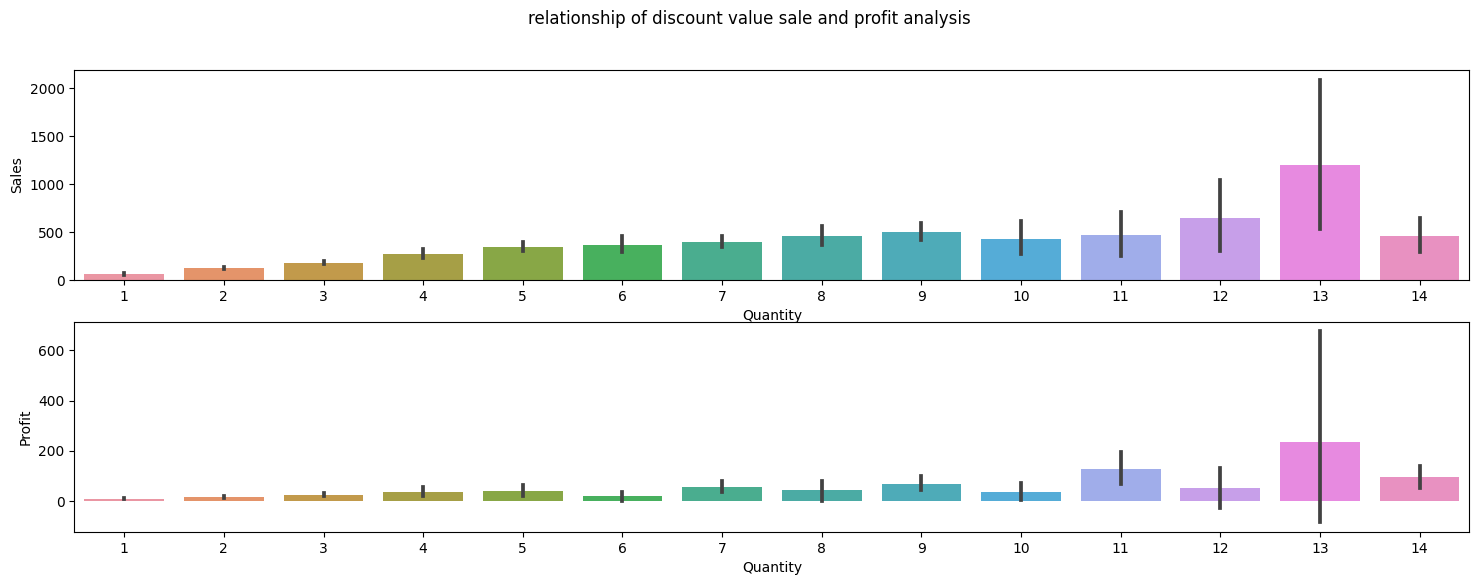

In [156]:
fig, ax = plt.subplots(2,1,figsize = (18,6))
fig.suptitle('relationship of discount value sale and profit analysis')
sns.barplot(sample_data_copy ,x = 'Quantity',y= 'Sales', ax = ax[0])
sns.barplot(sample_data_copy ,x = 'Quantity',y= 'Profit',ax = ax[1])

plt.show()

In [157]:
sample_data_copy_sort_by_sales = sample_data_copy.sort_values('Sales',ascending = False).head(10)
sample_data_copy_sort_by_sales.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Ship Time,Year,Month
2697,2014-03-18,2014-03-23,Standard Class,Sean Miller,Home Office,Florida,South,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784,5,2014,3
6826,2016-10-02,2016-10-09,Standard Class,Tamara Chand,Corporate,Indiana,Central,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760,7,2016,10
8153,2017-03-23,2017-03-25,First Class,Raymond Buch,Consumer,Washington,West,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808,2,2017,3
2623,2017-10-22,2017-10-24,First Class,Tom Ashbrook,Home Office,New York,East,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888,2,2017,10
4190,2017-11-17,2017-11-22,Standard Class,Hunter Lopez,Consumer,Delaware,East,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856,5,2017,11


In [158]:
sample_data_copy_sort_by_profit = sample_data_copy.sort_values('Profit',ascending = False).head(10)
sample_data_copy_sort_by_profit.head(10)

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Ship Time,Year,Month
6826,2016-10-02,2016-10-09,Standard Class,Tamara Chand,Corporate,Indiana,Central,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760,7,2016,10
8153,2017-03-23,2017-03-25,First Class,Raymond Buch,Consumer,Washington,West,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808,2,2017,3
4190,2017-11-17,2017-11-22,Standard Class,Hunter Lopez,Consumer,Delaware,East,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856,5,2017,11
9039,2016-12-17,2016-12-21,Standard Class,Adrian Barton,Consumer,Michigan,Central,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,9892.740,13,0.0,4946.3700,4,2016,12
4098,2014-09-23,2014-09-28,Standard Class,Sanjit Chand,Consumer,Minnesota,Central,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,9449.950,5,0.0,4630.4755,5,2014,9
2623,2017-10-22,2017-10-24,First Class,Tom Ashbrook,Home Office,New York,East,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888,2,2017,10
509,2015-03-16,2015-03-22,Standard Class,Christopher Martinez,Consumer,Georgia,South,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,6354.950,5,0.0,3177.4750,6,2015,3
8488,2016-02-02,2016-02-04,Second Class,Sanjit Engle,Consumer,Virginia,South,Technology,Machines,HP Designjet T520 Inkjet Large Format Printer ...,8749.950,5,0.0,2799.9840,2,2016,2
7666,2016-10-04,2016-10-08,Standard Class,Daniel Raglin,Home Office,Rhode Island,East,Technology,Copiers,Hewlett Packard LaserJet 3310 Copier,5399.910,9,0.0,2591.9568,4,2016,10
6520,2017-01-16,2017-01-18,Second Class,Andy Reiter,Consumer,Michigan,Central,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,5443.960,4,0.0,2504.2216,2,2017,1


In [159]:
x = {}
for column in sample_data_copy_sort_by_profit.columns:
    if column not in ['Order Date', 'Ship Date','Sales','Profit']:
        x[column] = []
        x[column] = sample_data_copy_sort_by_sales[column].unique().tolist() 
pd.DataFrame.from_dict(x,'index').transpose().head(10)

,Ship Mode,Customer Name,Segment,State,Region,Category,Sub-Category,Product Name,Quantity,Discount,Ship Time,Year,Month
0,Standard Class,Sean Miller,Home Office,Florida,South,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,6,0.5,5,2014,3
1,First Class,Tamara Chand,Corporate,Indiana,Central,Office Supplies,Copiers,Canon imageCLASS 2200 Advanced Copier,5,0.0,7,2016,10
2,Second Class,Raymond Buch,Consumer,Washington,West,None,Binders,GBC Ibimaster 500 Manual ProClick Binding System,4,0.2,2,2017,11
3,None,Tom Ashbrook,None,New York,East,None,None,Ibico EPK-21 Electric Binding System,3,0.4,4,None,12
4,None,Hunter Lopez,None,Delaware,None,None,None,"3D Systems Cube Printer, 2nd Generation, Magenta",13,None,None,None,9
5,None,Adrian Barton,None,Michigan,None,None,None,HP Designjet T520 Inkjet Large Format Printer ...,7,None,None,None,4
6,None,Sanjit Chand,None,Minnesota,None,None,None,None,None,None,None,None,2
7,None,Bill Shonely,None,New Jersey,None,None,None,None,None,None,None,None,5
8,None,Sanjit Engle,None,Virginia,None,None,None,None,None,None,None,None,None
9,None,Christopher Conant,None,Pennsylvania,None,None,None,None,None,None,None,None,None


In [160]:
x = {}
for column in sample_data_copy_sort_by_profit.columns:
    if column not in ['Order Date', 'Ship Date']:
        x[column] = []
        x[column] = sample_data_copy_sort_by_profit[column].unique().tolist() 
pd.DataFrame.from_dict(x,'index').transpose().head(10)


,Ship Mode,Customer Name,Segment,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Ship Time,Year,Month
0,Standard Class,Tamara Chand,Corporate,Indiana,Central,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.95,5,0.0,8399.976,7,2016,10
1,First Class,Raymond Buch,Consumer,Washington,West,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,13999.96,4,0.2,6719.9808,2,2017,3
2,Second Class,Hunter Lopez,Home Office,Delaware,East,None,Machines,Ibico EPK-21 Electric Binding System,10499.97,3,None,5039.9856,5,2014,11
3,None,Adrian Barton,None,Michigan,South,None,None,Fellowes PB500 Electric Punch Plastic Comb Bin...,9892.74,13,None,4946.37,4,2015,12
4,None,Sanjit Chand,None,Minnesota,None,None,None,HP Designjet T520 Inkjet Large Format Printer ...,9449.95,9,None,4630.4755,6,None,9
5,None,Tom Ashbrook,None,New York,None,None,None,Hewlett Packard LaserJet 3310 Copier,11199.968,None,None,3919.9888,None,None,2
6,None,Christopher Martinez,None,Georgia,None,None,None,GBC DocuBind P400 Electric Binding System,6354.95,None,None,3177.475,None,None,1
7,None,Sanjit Engle,None,Virginia,None,None,None,None,8749.95,None,None,2799.984,None,None,None
8,None,Daniel Raglin,None,Rhode Island,None,None,None,None,5399.91,None,None,2591.9568,None,None,None
9,None,Andy Reiter,None,None,None,None,None,None,5443.96,None,None,2504.2216,None,None,None


## Điều gì đã xảy ra với Tủ Sách và Bàn?

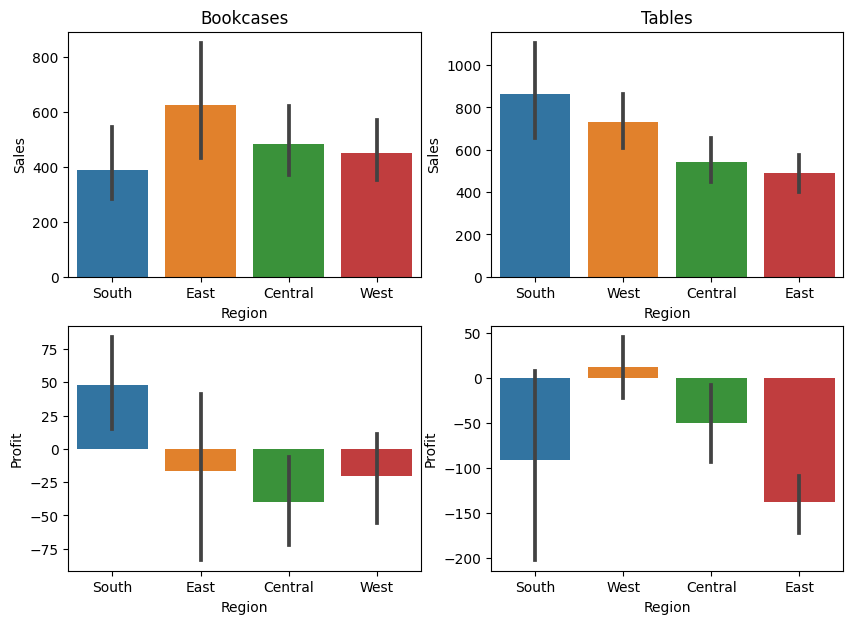

In [161]:
fig, ax = plt.subplots(2,2,figsize = (10,7))
sns.barplot(sample_data_copy.where(sample_data_copy['Sub-Category'] == 'Bookcases') ,x = 'Region',y= 'Sales', ax = ax[0][0]).set_title("Bookcases")
sns.barplot(sample_data_copy.where(sample_data_copy['Sub-Category'] == 'Bookcases') ,x = 'Region',y= 'Profit', ax = ax[1][0])
sns.barplot(sample_data_copy.where(sample_data_copy['Sub-Category'] == 'Tables' ),x = 'Region',y= 'Sales', ax = ax[0][1]).set_title("Tables")
sns.barplot(sample_data_copy.where(sample_data_copy['Sub-Category'] == 'Tables' ),x = 'Region',y= 'Profit', ax = ax[1][1])
plt.show()

- Về Tủ sách, Doanh số bán hàng cao ở Miền Đông, Miền Trung, Miền Tây nhưng Lợi nhuận âm
- Về Bàn, Doanh số bán hàng cao tại Miền Nam, Miền Trung, Miền Đông nhưng Lợi nhuận âm

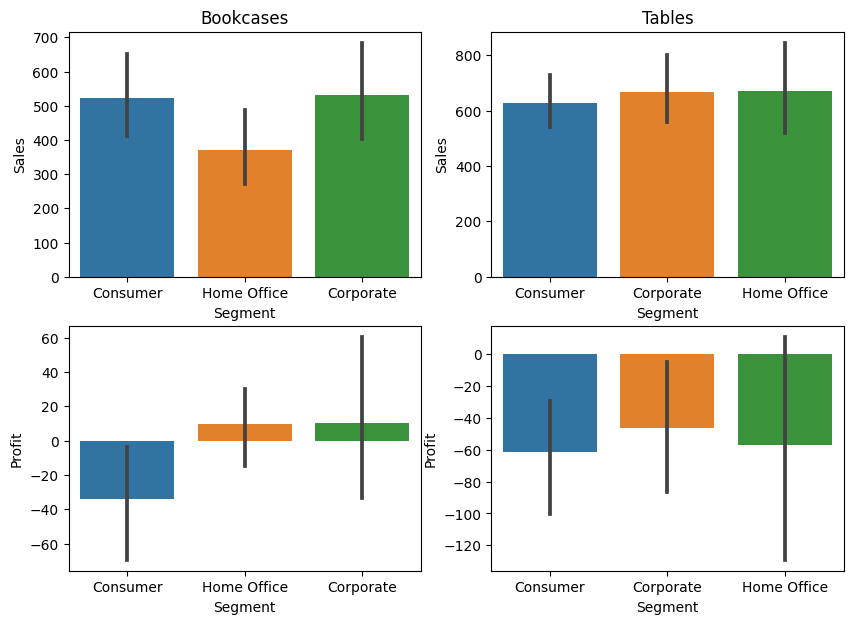

In [162]:
fig, ax = plt.subplots(2,2,figsize = (10,7))
x = 'Segment'
sns.barplot(sample_data_copy.where(sample_data_copy['Sub-Category'] == 'Bookcases') ,x = x,y= 'Sales', ax = ax[0][0]).set_title("Bookcases")
sns.barplot(sample_data_copy.where(sample_data_copy['Sub-Category'] == 'Bookcases') ,x = x,y= 'Profit', ax = ax[1][0])
sns.barplot(sample_data_copy.where(sample_data_copy['Sub-Category'] == 'Tables' ),   x = x,y= 'Sales', ax = ax[0][1]).set_title("Tables")
sns.barplot(sample_data_copy.where(sample_data_copy['Sub-Category'] == 'Tables' ),   x = x,y= 'Profit', ax = ax[1][1])
plt.show()

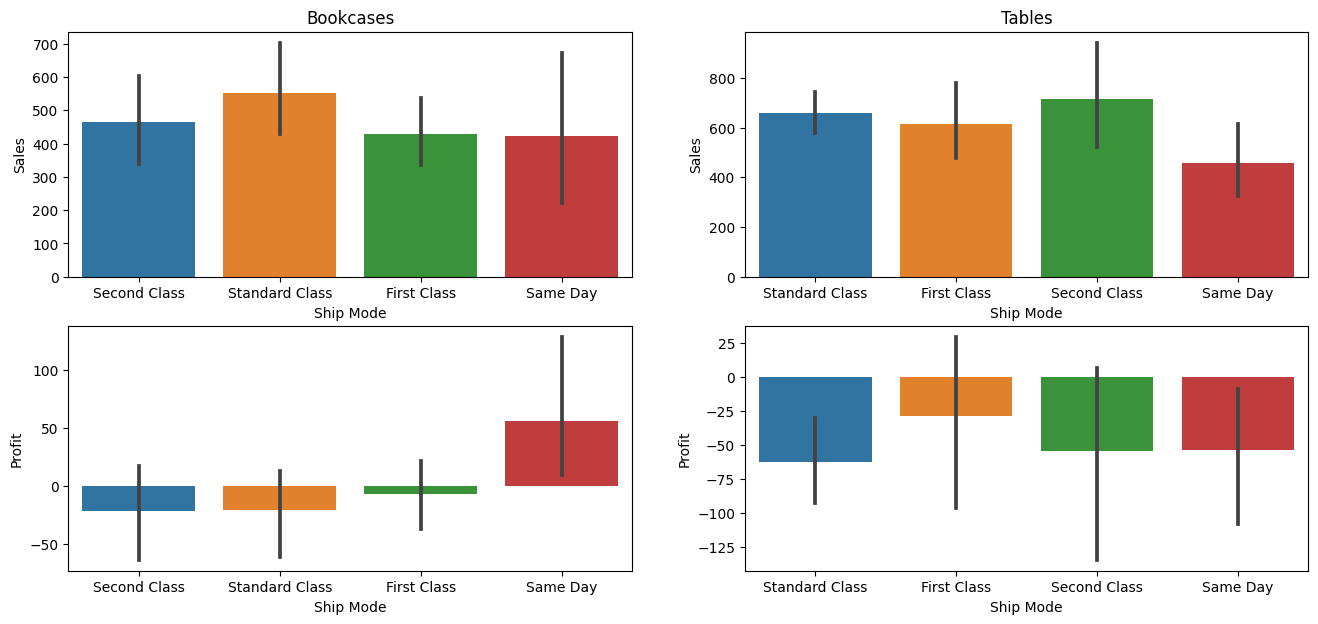

In [163]:
fig, ax = plt.subplots(2,2,figsize = (16,7))
x = 'Ship Mode'
sns.barplot(sample_data_copy.where(sample_data_copy['Sub-Category'] == 'Bookcases') ,x = x,y= 'Sales', ax = ax[0][0]).set_title("Bookcases")
sns.barplot(sample_data_copy.where(sample_data_copy['Sub-Category'] == 'Bookcases') ,x = x,y= 'Profit', ax = ax[1][0])
sns.barplot(sample_data_copy.where(sample_data_copy['Sub-Category'] == 'Tables' ),   x = x,y= 'Sales', ax = ax[0][1]).set_title("Tables")
sns.barplot(sample_data_copy.where(sample_data_copy['Sub-Category'] == 'Tables' ),   x = x,y= 'Profit', ax = ax[1][1])
plt.show()

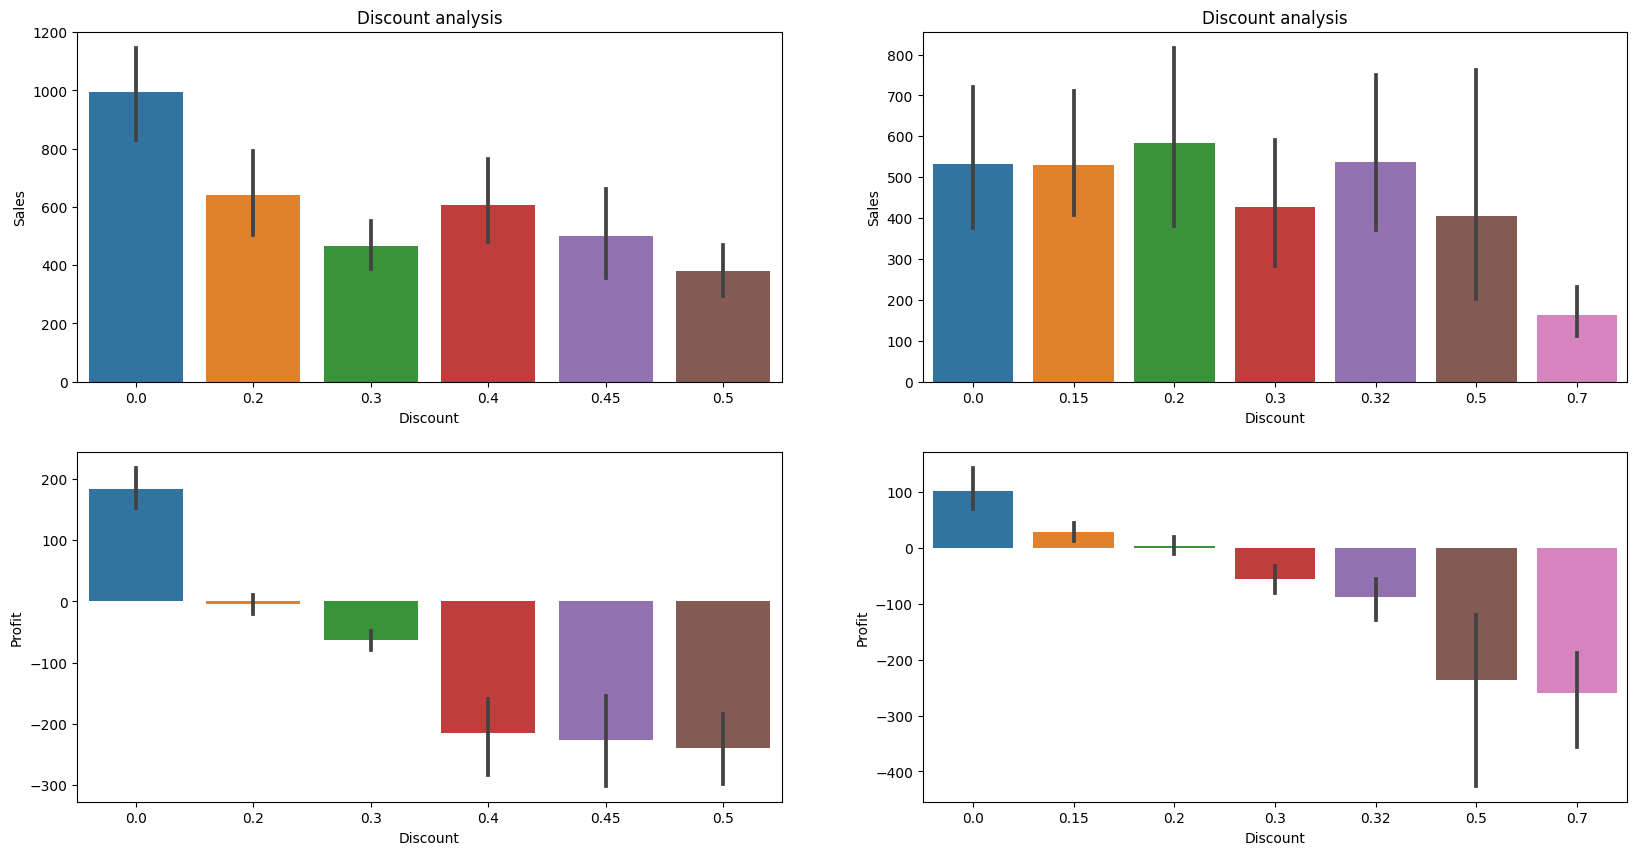

In [164]:
fig, ax = plt.subplots(2,2,figsize = (20,10))
sns.barplot(sample_data_copy.where(sample_data_copy['Sub-Category'] == 'Tables') ,x = 'Discount',y= 'Sales', ax = ax[0][0]).set_title('Discount analysis')
sns.barplot(sample_data_copy.where(sample_data_copy['Sub-Category'] == 'Tables') ,x = 'Discount',y= 'Profit',ax = ax[1][0])
sns.barplot(sample_data_copy.where(sample_data_copy['Sub-Category'] == 'Bookcases') ,x = 'Discount',y= 'Sales', ax = ax[0][1]).set_title('Discount analysis')
sns.barplot(sample_data_copy.where(sample_data_copy['Sub-Category'] == 'Bookcases') ,x = 'Discount',y= 'Profit',ax = ax[1][1])
plt.show()

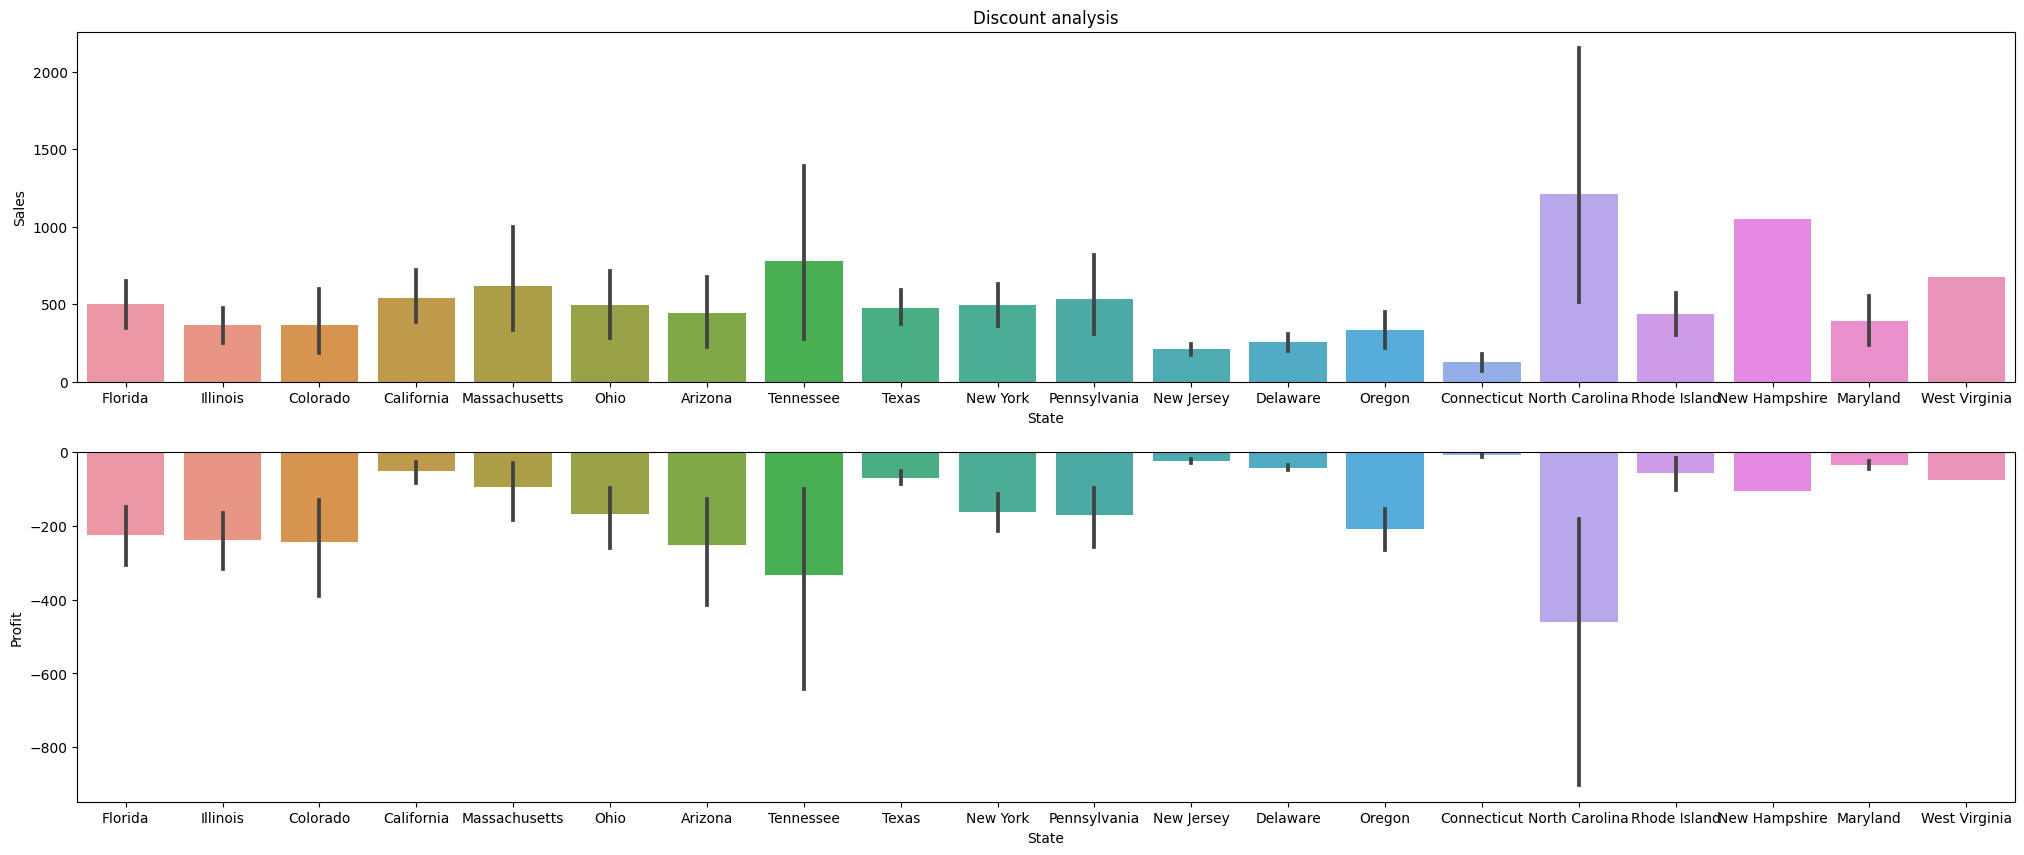

In [165]:
fig, ax = plt.subplots(2,1,figsize = (25,10))
column_name = "State"
sns.barplot(sample_data_copy.where((sample_data_copy['Sub-Category'] == 'Tables')    & (sample_data_copy['Profit']<=0) ) ,   x = column_name,y= 'Sales', ax = ax[0]).set_title('Discount analysis')
sns.barplot(sample_data_copy.where((sample_data_copy['Sub-Category'] == 'Tables')    & (sample_data_copy['Profit']<=0) ) ,   x = column_name,y= 'Profit',ax = ax[1])
plt.show()

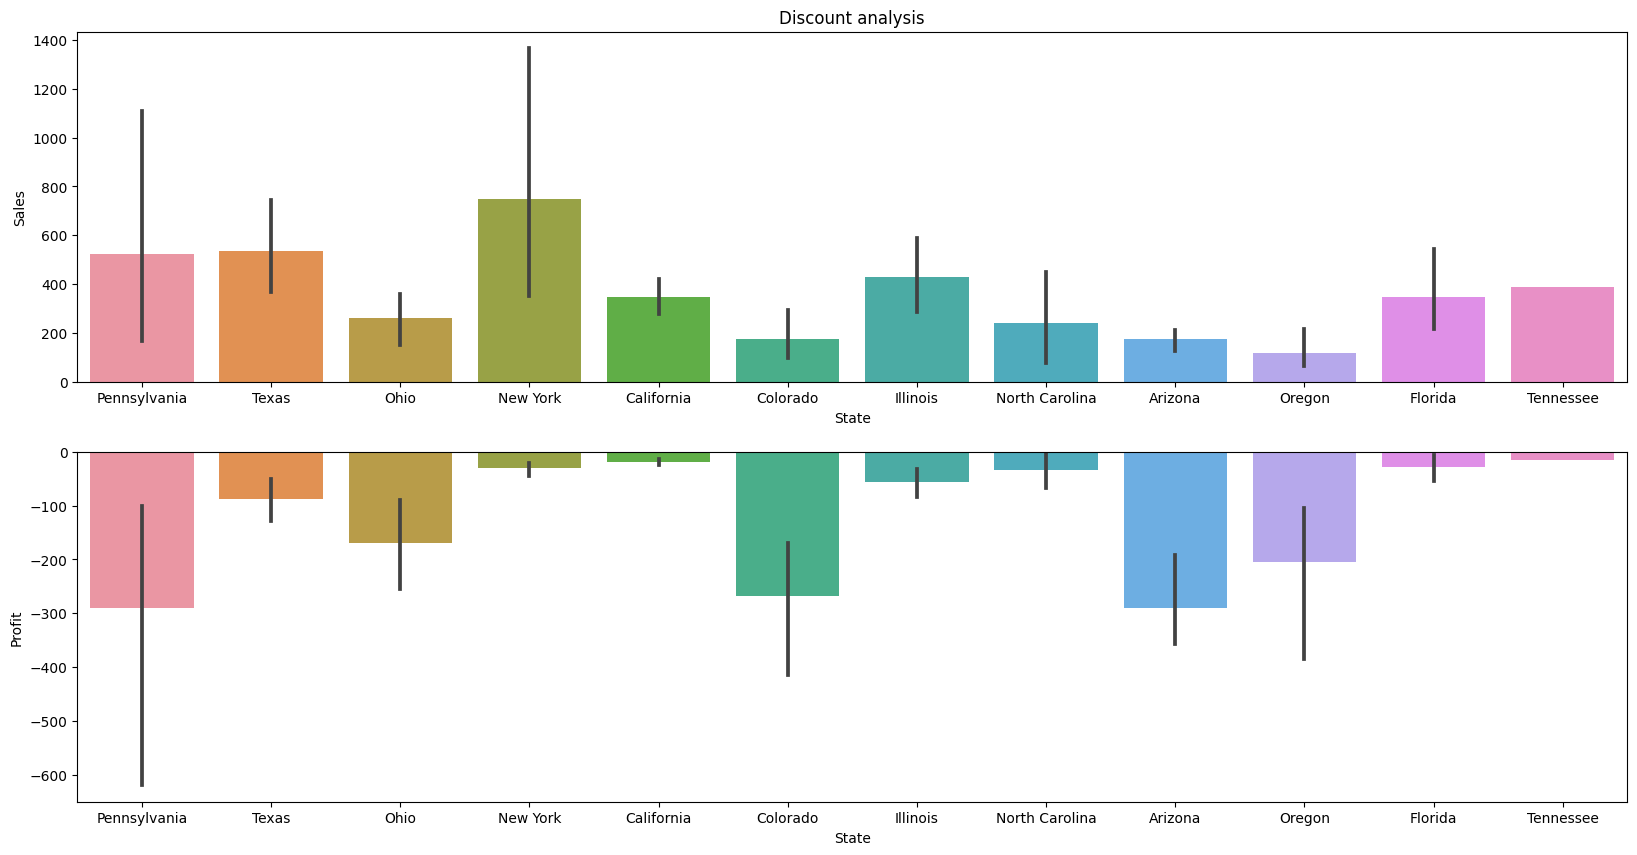

In [166]:
fig, ax = plt.subplots(2,1,figsize = (20,10))
column_name = "State"
sns.barplot(sample_data_copy.where((sample_data_copy['Sub-Category'] == 'Bookcases') & (sample_data_copy['Profit']<=0) ) ,   x = column_name,y= 'Sales', ax = ax[0]).set_title('Discount analysis')
sns.barplot(sample_data_copy.where((sample_data_copy['Sub-Category'] == 'Bookcases') & (sample_data_copy['Profit']<=0) ) ,   x = column_name,y= 'Profit',ax = ax[1])
plt.show()

# **Tóm tắt**

## **Tập dữ liệu**

- Tập dữ liệu này có 9994 hàng và 21 cột. Một số cột chúng ta không cần tập trung vào trong tập dữ liệu là "ID hàng", 'ID đơn hàng', "ID khách hàng", 'ID sản phẩm', "Mã bưu chính", "Thành phố", "Quốc gia"
- Hoạt động kinh doanh của chúng tôi là từ năm 2014 đến năm 2017.
- Chúng tôi có 3 loại có Nội thất, Vật tư văn phòng, Công nghệ.
- Phân khúc là Người tiêu dùng, Doanh nghiệp, Văn phòng tại nhà.
- Chúng tôi có 4 chế độ tàu như: Hạng nhất, Hạng hai, Tiêu chuẩn và Cùng ngày.
## **Phân tích dữ liệu**
### **Thống kê**

- Từ hàm mô tả, ta biết rằng:
- Chúng tôi có tổng cộng 9994 đơn hàng, doanh thu trung bình khoảng 229,8$, lợi nhuận trung bình khoảng 28,656896.
- Doanh số tối đa là khoảng 22638$ và doanh số tối thiểu là khoảng 0,444$
- Lợi nhuận tối đa là khoảng 8399,976$ và lợi nhuận tối thiểu là khoảng -6599,978$. Điều đó có nghĩa là hoạt động kinh doanh của chúng tôi có lợi nhuận âm.
- Giá bán trung bình là 54,49
- Doanh số 75% là 209,94 nghĩa là chúng ta có 25% đơn hàng lớn hơn 209,94 nhưng vẫn thấp hơn mức trung bình của doanh số.
- Vì vậy, dưới 25% khách hàng thuộc top đầu là quan trọng đối với hoạt động kinh doanh của chúng tôi.
- Sau khi sử dụng hồi quy tuyến tính, có vẻ khác biệt về mối quan hệ giữa kết quả Doanh thu và Lợi nhuận theo từng năm.
- Giá bán có xu hướng giảm dần qua các năm
- Nhưng xu hướng lợi nhuận lại đi ngược lại.
### **Đi sâu vào phân tích dữ liệu**
#### **Loại**
- Số lượng văn phòng phẩm lên tới 60,3%. Đó là tỷ lệ phần trăm cao nhất nhưng doanh số bán hàng thấp nhất (khoảng 120$)
- Tỷ lệ Công nghệ thấp nhất (18,5%) nhưng hiệu quả bán hàng và lợi nhuận ổn định và cao nhất
- Hiệu suất bán hàng nội thất khá cao nhưng lãi không nhiều.
- Về danh mục phụ, hiệu suất nổi bật là: 'Binders', 'Ghế', 'Nhãn', 'Lưu trữ', 'Nội thất', 'Nghệ thuật', 'Điện thoại', 'Thiết bị gia dụng', 'Giấy', 'Phụ kiện'
- Phân tích sâu vào chuyên mục Nội thất:
- Doanh số bán Tủ sách và Bàn khá cao nhưng không hiểu sao lại có lãi âm.
- Tủ sách -15.2305$
- Bàn - 55,5658$
- Doanh thu và lợi nhuận của Máy Photocopy là cao nhất.
#### **Bộ phận**
> Chúng tôi có 3 phân khúc: Người tiêu dùng (51,9%), Doanh nghiệp (30,2%), Văn phòng tại nhà (17,8%)
*Từ biểu đồ bán hàng và hiệu suất lợi nhuận, tôi có thể nhanh chóng kết luận rằng tài sản này không có nhiều tác động đến quá trình kinh doanh*
#### **Vận chuyển hàng**
- Chế độ tàu
Hầu hết khách hàng chọn Hạng Chuẩn (59,7%)
Tình hình hoạt động của phương thức tàu biển ổn định giữa Doanh thu và lợi nhuận.
- Giờ tàu
- Thời gian vận chuyển trung bình khoảng 4 ngày.
- Thời gian vận chuyển lâu nhất là 7 ngày.
- Có khoảng 25% đơn hàng mất từ 5 - 7 ngày để vận chuyển.
#### **Giảm giá**
Ở đây, chúng ta có thể thấy số tiền chiết khấu ảnh hưởng rất lớn đến lợi nhuận.
> Chiết khấu từ 0,3 đến 0,8 khiến lợi nhuận âm. Nếu muốn có lãi thì nên cân nhắc mức chiết khấu dưới 0,3=
### **Phân tích lợi nhuận**
> Tủ sách và bàn là những thứ mang lại lợi nhuận âm nhiều nhất
Từ bản tóm tắt của quá trình kinh doanh. Chúng ta có thể thấy rằng chính sách chiết khấu của công ty sẽ ảnh hưởng trực tiếp đến Lợi nhuận. Dễ dàng nhận thấy Doanh số đạt cao nhất nếu chúng ta giảm giá 50%.
Nhưng đây cũng là mức độ mất lợi nhuận cao nhất. Từ 30%- 50%, chúng tôi có thể bán được nhiều sản phẩm hơn nhưng từ 30% lợi nhuận. Chúng tôi có xu hướng nhận được nhiều lợi nhuận âm hơn.
- Với các tủ sách bán ở miền Đông, miền Trung hay miền Tây, dù doanh thu tốt nhưng lợi nhuận vẫn dưới 0. Thấp nhất là miền Trung.
- Với các bàn bán ở miền Nam, miền Đông, miền Trung mặc dù doanh thu tốt nhưng lợi nhuận vẫn dưới 0. Thấp nhất là miền Đông.
Sau khi phân tích lợi nhuận của Phân khúc theo Tủ sách và Bàn, tôi biết rằng tất cả loại Phân khúc đều khiến lợi nhuận của Bàn âm và về Tủ sách, chỉ Người tiêu dùng mới kiếm được lợi nhuận nhỏ hơn 0.

Về phía Vận chuyển:
- Tất cả chế độ vận chuyển của Bàn đều nhỏ hơn 0 và chỉ có 'SameDay' mới mang lại lợi nhuận cho Tủ sách dương.

Theo Nhà nước có phân tích lợi nhuận âm thì số nhà nước mua Bàn có lợi nhuận âm nhiều hơn so với Tủ sách.
- Điểm nổi bật dành cho Carolina Rhode, Tennessee, New Hampshire (Bảng)
- Điểm nổi bật là dành cho Carolina Arizona, Pennsylvania, Colorado (Tủ sách)
### Phần kết luận
- Vì một lý do nào đó, việc bán bàn là nguyên nhân khiến doanh nghiệp có lợi nhuận âm nhiều nhất. Và không phải do chế độ Tàu, Khu vực, Phân khúc. Bộ dữ liệu này còn thiếu nhiều thông tin khác để biết lý do bên này. Nếu muốn hoàn thiện hơn, chúng ta nên cố gắng đánh dấu vào Nhà nước, Chính sách chiết khấu hoặc mặt khác nếu có thêm thông tin.
- Chính sách chiết khấu cũng là một điều rất quan trọng để doanh nghiệp có được lợi nhuận tốt hơn. (dưới 30% sẽ có kết quả dương tính)
- Sản phẩm công nghệ có lợi nhuận và doanh thu ổn định nên chúng ta cần chú ý hơn đến vấn đề này. Có thể có thêm chính sách để thúc đẩy bán hàng.